In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

images=np.load('larImages.npy') #Load the l
meta=np.load('meta.npy')

print("images.shape",images.shape)
print("meta.shape",meta.shape)

images.shape (10000, 100, 100)
meta.shape (10000, 64)


Define our noise function in a new way - this time the noise will be centred around zero, with all negative values being set to zero and the standard deviation of the noise equal to y_noise.

In [2]:
def add_noise(images, y_noise):
    '''Adds noise to a set of images following the normal distribution'''
    
    # Create noise that follows normal distribution
    images_noise = images + np.random.normal(loc=0, scale=y_noise, size=images.shape)
    # Set any negative values in the images to zero
    for i in range(10000):
        for j in range(100):
            k = 0
            for val in images_noise[i, j]:
                    if val < 0:
                        images_noise[i,j,k] = 0
                    k += 1
    
    return images_noise

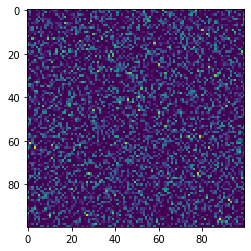

In [3]:
plain_images = np.zeros_like(images)
detector_noise = add_noise(plain_images, 2)
plt.imshow(detector_noise[1],interpolation='nearest')

This has far more zero values which may be a more realistic way of simulating noise, I will now train the classifier on this and see how it performs.

In [4]:
# Create a training array which is a combination of noisy detector and clean neutrino images, with accompanying labels

image_labels = np.ones(10000)
detector_labels = np.zeros(10000)
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

train_images = np.concatenate((images, detector_noise), axis=0)
train_labels = np.concatenate((image_labels, detector_labels), axis=0)

train_images, train_labels = unison_shuffled_copies(train_images, train_labels)

# Reshape to 4 dimensions for keras
train_images = train_images.reshape(20000, 100, 100, 1)

In [5]:
# Create a convolutional neural network to act as a classifier

model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(2, (5, 5), activation='relu', input_shape=(100,100,1)))
#model.add(keras.layers.MaxPooling2D((2, 2)))
#model.add(keras.layers.Conv2D(32, (5, 5), activation='relu'))
#model.add(keras.layers.MaxPooling2D((2, 2)))
#model.add(keras.layers.Conv2D(32, (5, 5), activation='relu'))
model2.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(8, activation='relu'))
model2.add(keras.layers.Dense(2))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 2)         52        
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 36866     
Total params: 36,918
Trainable params: 36,918
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile network

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
# Train on training images

history2 = model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
625/625 [==============================] - 11s 17ms/step - loss: 0.0073 - accuracy: 0.9969
Epoch 2/5
625/625 [==============================] - 11s 17ms/step - loss: 5.2714e-06 - accuracy: 1.0000
Epoch 3/5
625/625 [==============================] - 11s 18ms/step - loss: 1.6184e-06 - accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 13s 21ms/step - loss: 7.2217e-07 - accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 3.8302e-07 - accuracy: 1.0000


In [8]:
# Create a range of test arrays and test the model on each one, storing the results
values = np.linspace(0,10,11)
test_loss = []
test_acc = []
for i in values:   
    
    detector_noise = add_noise(plain_images, i)

    test_images = np.concatenate((images, detector_noise), axis=0)
    test_labels = np.concatenate((image_labels, detector_labels), axis=0)

    test_images, test_labels = unison_shuffled_copies(test_images, test_labels)

    test_images = test_images.reshape(20000, 100, 100, 1)

    test_loss_temp, test_acc_temp = model2.evaluate(test_images,  test_labels)
    
    test_loss.append(test_loss_temp)
    test_acc.append(test_acc_temp)

625/625 [==============================] - 4s 7ms/step - loss: 2.6079e-07 - accuracy: 1.0000


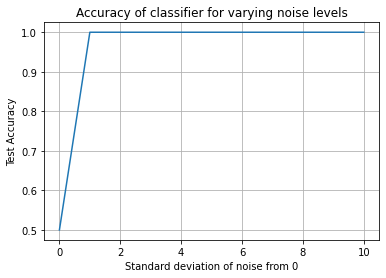

In [36]:
plt.plot(values, test_acc)
plt.title('Accuracy of classifier for varying noise levels')
plt.xlabel('Standard deviation of noise from 0')
plt.ylabel('Test Accuracy')
plt.grid()

In [38]:
# Create a range of test arrays and test the model on each one, storing the results
values_2 = np.linspace(0,1,11)
test_loss_2 = []
test_acc_2 = []
for i in values_2:   
    
    detector_noise = add_noise(plain_images, i)

    test_images = np.concatenate((images, detector_noise), axis=0)
    test_labels = np.concatenate((image_labels, detector_labels), axis=0)

    test_images, test_labels = unison_shuffled_copies(test_images, test_labels)

    test_images = test_images.reshape(20000, 100, 100, 1)

    test_loss_temp, test_acc_temp = model2.evaluate(test_images,  test_labels)
    
    test_loss_2.append(test_loss_temp)
    test_acc_2.append(test_acc_temp)

625/625 [==============================] - 3s 6ms/step - loss: 7.5269e-04 - accuracy: 1.0000


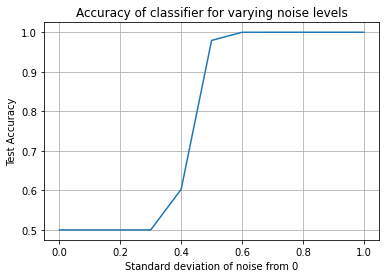

In [39]:
plt.plot(values_2, test_acc_2)
plt.title('Accuracy of classifier for varying noise levels')
plt.xlabel('Standard deviation of noise from 0')
plt.ylabel('Test Accuracy')
plt.grid()

This method of noise appears to be easy for the classifier to achieve 100 percent accuracy as well. Now to test the overlaid versions.

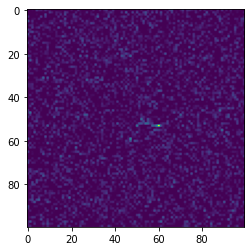

In [40]:
overlaid = add_noise(images, 3)
plt.imshow(overlaid[0])

In [41]:
values_3 = np.linspace(0,3,11)
test_loss_3 = []
test_acc_3 = []
for i in values_3:   
    
    overlaid = add_noise(images, i)
    
    detector_noise = add_noise(plain_images, i)

    test_images = np.concatenate((overlaid, detector_noise), axis=0)
    test_labels = np.concatenate((image_labels, detector_labels), axis=0)

    test_images, test_labels = unison_shuffled_copies(test_images, test_labels)

    test_images = test_images.reshape(20000, 100, 100, 1)

    test_loss_temp, test_acc_temp = model2.evaluate(test_images,  test_labels)
    
    test_loss_3.append(test_loss_temp)
    test_acc_3.append(test_acc_temp)

625/625 [==============================] - 4s 6ms/step - loss: 10.9881 - accuracy: 0.5003


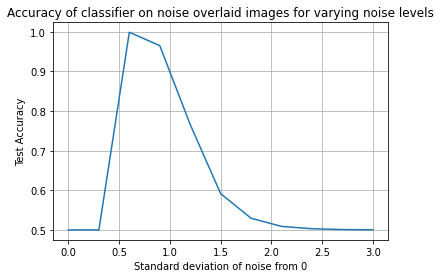

In [42]:
plt.plot(values_3, test_acc_3)
plt.title('Accuracy of classifier on noise overlaid images for varying noise levels')
plt.xlabel('Standard deviation of noise from 0')
plt.ylabel('Test Accuracy')
plt.grid()

[0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
